<a href="https://colab.research.google.com/github/TejoVK/Covid19Prediction/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #with pandas we can load csv files

In [ ]:
Active_Cases = pd.read_csv('/content/Active_Cases.csv')

In [ ]:
covid = pd.read_csv('/content/covid.csv') # I now loaded the file and stored it in an object named covid

In [ ]:
covid.head() # it gives the info present in the first 5 rows of the data set

,S.No,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death
0,1,03-12-2019,India,74,71,3,0
1,2,04-12-2019,India,75,71,3,1
2,3,05-12-2019,India,84,72,10,2
3,4,06-12-2019,India,107,95,10,2
4,5,07-12-2019,India,114,99,13,2


In [ ]:
covid.shape # .shape tellsus the shape of the dataset i.e no. of rows and columns

(629, 7)

In [ ]:
covid.columns

Index(['S.No', 'Date', 'Region', 'Confirmed_Cases', 'Active_Cases',
       'Cured/Discharged', 'Death'],
      dtype='object')

In [ ]:
covid["Region"].value_counts() #looking the number of values for India 

India    629
Name: Region, dtype: int64

In [ ]:
covid.describe(include='O') # tells us about the catagorical columns

,Date,Region
count,629,629
unique,629,1
top,04-02-2021,India
freq,1,629


In [ ]:
covid.isna().any() # Gives bolean value ,to check whether any column has any free values

S.No                False
Date                False
Region              False
Confirmed_Cases     False
Active_Cases        False
Cured/Discharged    False
Death               False
dtype: bool

In [ ]:
covid.isna().sum()
#tells us the numer of null values in each column, in our case it's 0

S.No                0
Date                0
Region              0
Confirmed_Cases     0
Active_Cases        0
Cured/Discharged    0
Death               0
dtype: int64

In [ ]:
covid.tail()# it gives the info present in the last 5 rows of the data set

,S.No,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death
624,625,18-08-2021,India,34540275,83913,34178940,477422
625,626,19-08-2021,India,34546838,82267,34187017,477554
626,627,20-08-2021,India,34697860,91456,34130768,475636
627,628,21-08-2021,India,34703644,88993,34138763,475888
628,629,22-08-2021,India,34710628,87562,34146931,476135


In [ ]:
import seaborn as sns
#seaborn is a visualisation library i.e based on matplotlib and from matplotlib we are importing pyplot library
from matplotlib import pyplot as plt  #pyplot is a submodule of mathplotlib

Seaborn is one of the world’s most regarded Python libraries that is purpose-built to create beautiful-looking visualizations. It can be considered as an extension of another library called Matplotlib as it is built on top of that. Referrence-> Intellipaat

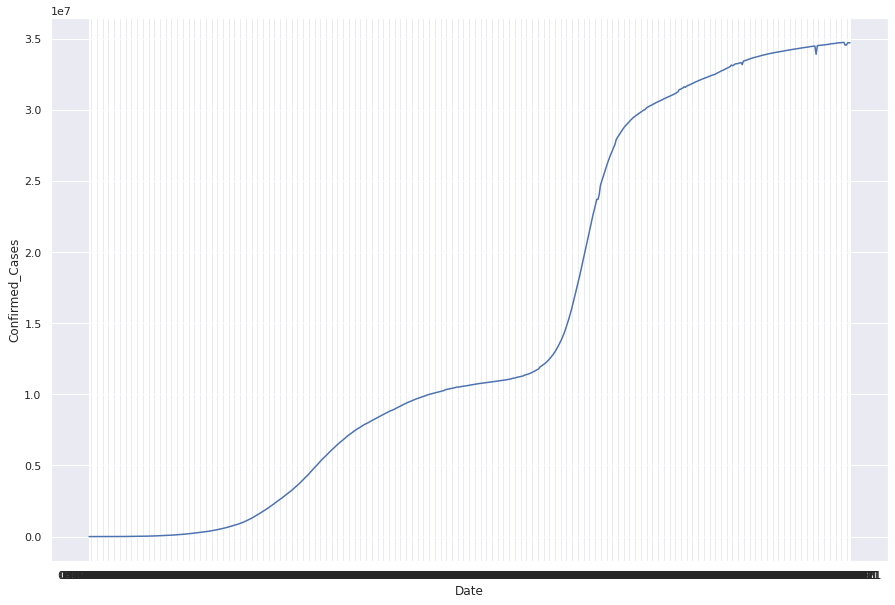

In [ ]:
#total confirmed cases per day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date",y="Confirmed_Cases",data=covid)
plt.show()

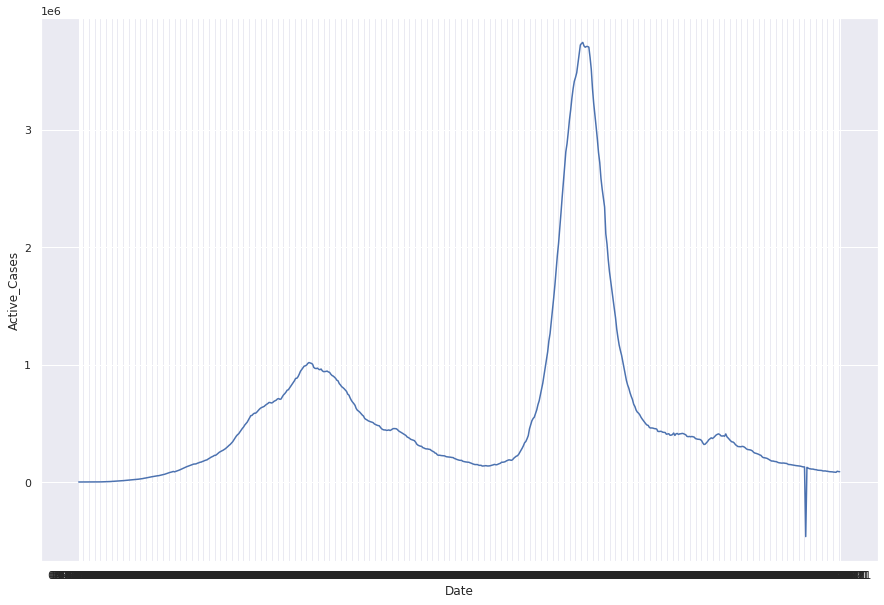

In [ ]:
#total active cases per day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date",y="Active_Cases",data=covid)
plt.show()

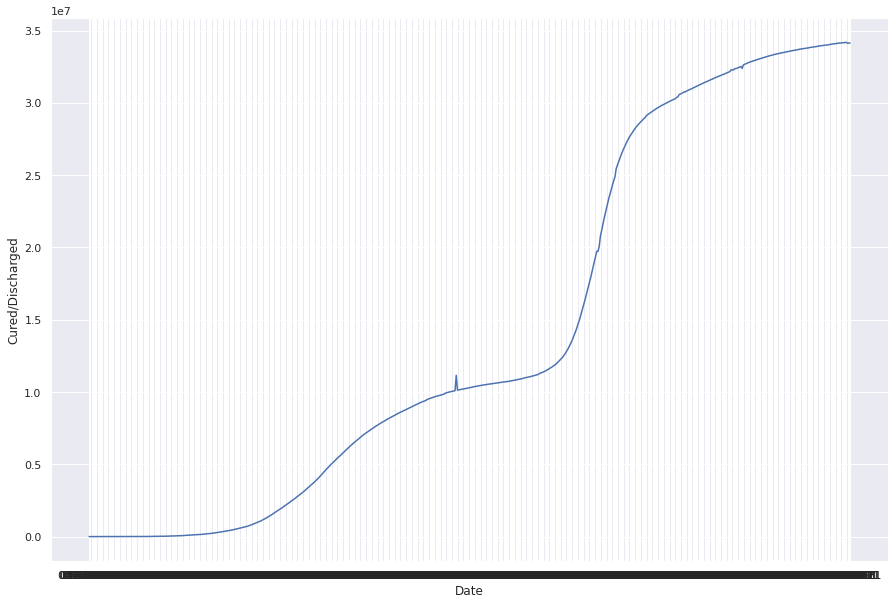

In [ ]:
#total cured cases per day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date",y="Cured/Discharged",data=covid)
plt.show()

In [ ]:
covid_last_5_days=covid.tail() 
#checking the graph for last five days

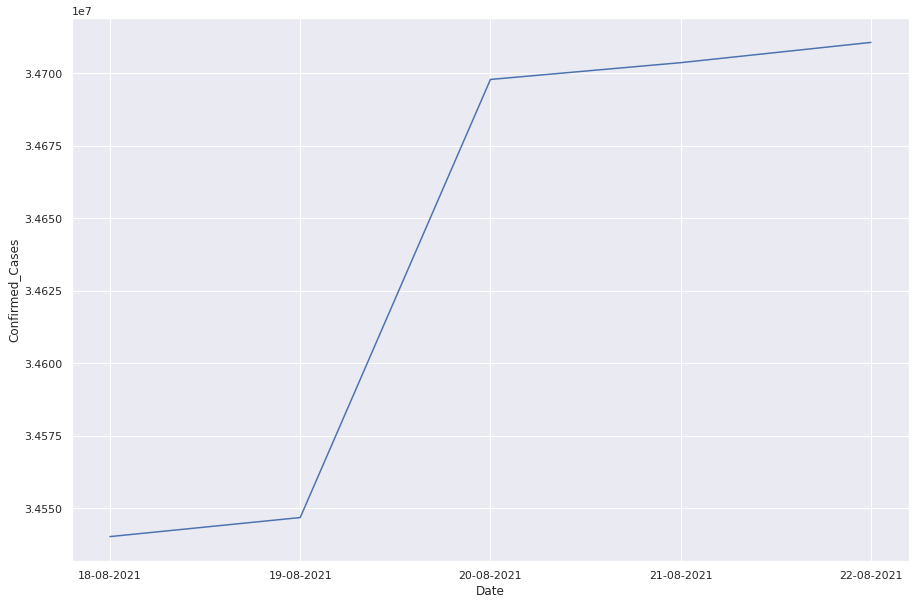

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date",y="Confirmed_Cases",data=covid_last_5_days)
plt.show()

In [ ]:
covid.head()

,S.No,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death
0,1,03-12-2019,India,74,71,3,0
1,2,04-12-2019,India,75,71,3,1
2,3,05-12-2019,India,84,72,10,2
3,4,06-12-2019,India,107,95,10,2
4,5,07-12-2019,India,114,99,13,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import datetime as dt
covid['Date'] = pd.to_datetime(covid['Date'])
covid.head()

,S.No,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death
0,1,2019-03-12,India,74,71,3,0
1,2,2019-04-12,India,75,71,3,1
2,3,2019-05-12,India,84,72,10,2
3,4,2019-06-12,India,107,95,10,2
4,5,2019-07-12,India,114,99,13,2


In [ ]:
covid['Date'] = covid['Date'].map(dt.datetime.toordinal)
covid.head()

,S.No,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death
0,1,737130,India,74,71,3,0
1,2,737161,India,75,71,3,1
2,3,737191,India,84,72,10,2
3,4,737222,India,107,95,10,2
4,5,737252,India,114,99,13,2


In [ ]:
x = covid['Date']
y = covid['Active_Cases']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
import numpy as np
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [ ]:
covid.tail()

,S.No,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death
624,625,738020,India,34540275,83913,34178940,477422
625,626,738021,India,34546838,82267,34187017,477554
626,627,738022,India,34697860,91456,34130768,475636
627,628,738023,India,34703644,88993,34138763,475888
628,629,738024,India,34710628,87562,34146931,476135


In [ ]:
y_pred = lr.predict(np.array(x_test).reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(x_test,y_pred)

59798780689.88763

In [ ]:
lr.predict(np.array([[737696]]))

array([[556513.5555644]])

In [ ]:
dates = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629]

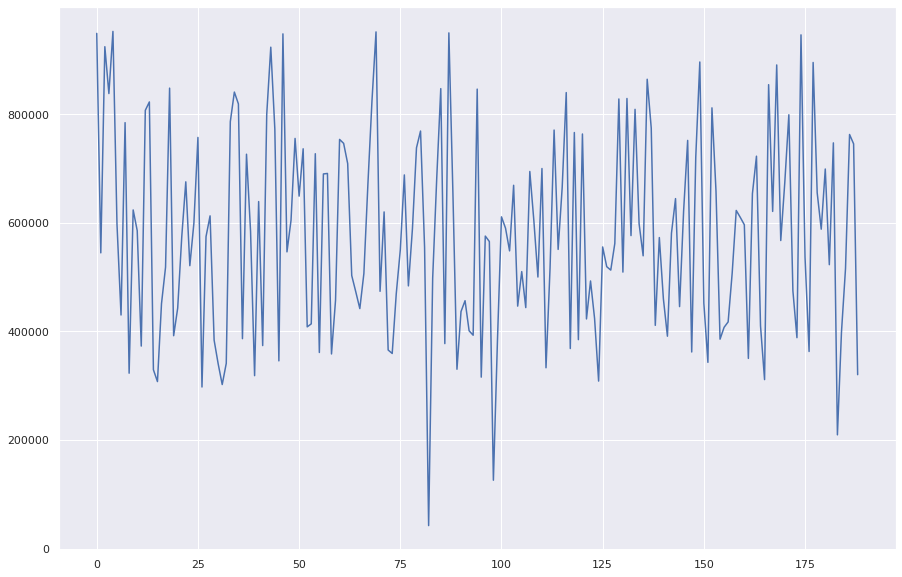

In [ ]:
plt.plot(y_pred)